### Week 12 - Practice Clustering

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
# create a dataset with 4 blobs 
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# when you load csv file - use: pd.read_csv('file name') # specifying encoding is not needed for your final project (data is numeric)

### How many cluster?

In [42]:
# create an array with two features
points = data[0]

#type(points) - use to check if it is numpy array

In [43]:
f1 = data[0][:,0] # if you load from dataframe use data['columnname1'].values
f2 = data[0][:,1] # # if you load from dataframe use data['columnname2'].values

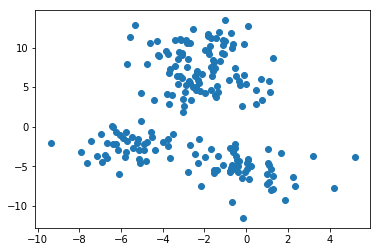

In [44]:
#Make a scater plot with two features
plt.scatter(f1,f2)

In [48]:
# run KMeans on df (with n_clusters=4) - that is what we specified when we created dataset

model = KMeans(n_clusters=4)
# fit kmeans object to data df
model.fit(points)
labels = model.predict(points)


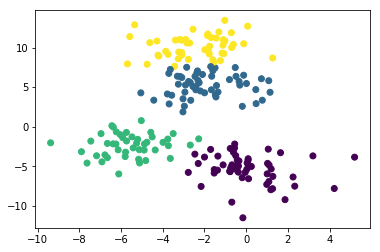

In [49]:
# make a scatter plot with labels
plt.scatter(f1,f2,c=labels)
plt.show()

### Inspect your clustering with centroids

In [65]:
centroids = model.cluster_centers_
print(centroids)

[[ 0.05161133 -5.35489826]
 [-1.92101646  5.21673484]
 [-5.56465793 -2.34988939]
 [-2.40167949 10.17352695]]


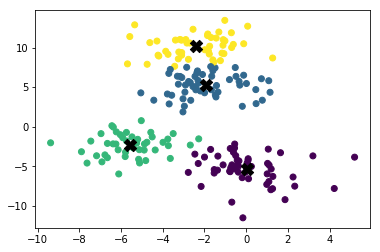

In [64]:
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(f1,f2,c=labels)
plt.scatter(centroids_x,centroids_y, marker = 'X', s=150, c='black')

### Evaluate the best number of clusters

In [66]:
# make a range
ks = range(1, 15)

inertias = [] # empty list

# do a for loop
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(points)    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

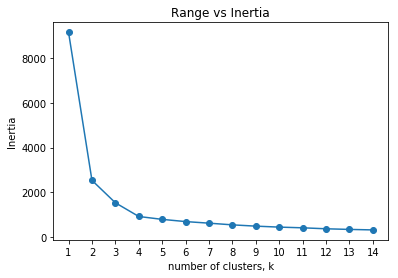

In [70]:
# Plot Range vs Inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()
### In your final project - explain how to determine the  best number of clusters

### Examine the extent of variation in both features

Recall too much variation in sd can affect the clustering.


In [73]:
from statistics import stdev
stdev(f1),stdev(f2)

(2.4832971937404387, 6.316880234146339)

In [74]:
#Perform normalization
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [80]:
scaler = StandardScaler()
# Create KMeans instance: kmeans
model = KMeans(n_clusters=4) # we are using 4 here because our dataset was created with 4 clusters initially. 
#In your real dataset use the best optimal number you have selected using Inertias.
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,model)
pipeline.fit(points)
labels = pipeline.predict(points)

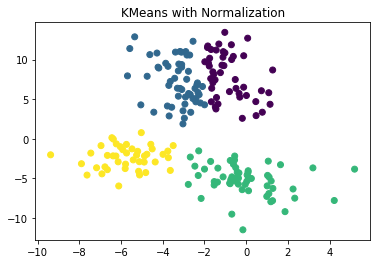

In [79]:
# make a scatter plot with labels
plt.scatter(f1,f2,c=labels)
plt.title('KMeans with Normalization')
plt.show()
# compare your first scatter plot without normalization

## Part 2 - Your Turn

In [8]:
# Download csv file that consists of 2 columns with numerical data
mydata = pd.read_csv('xclara.csv')

In [9]:
# to get points from data frame use (uncomment below)
# in this data you have onely two columns to plot on a scatterplot. 
#With more features, use the correlation heatmap to find any high correlation between columns (closer to one), for eaxmple 0.78, 080 etc (do not use CLASS and ID)
f1 = mydata['V1'].values
f2 = mydata['V2'].values

You task is to reproduce code from Part 1 by your self

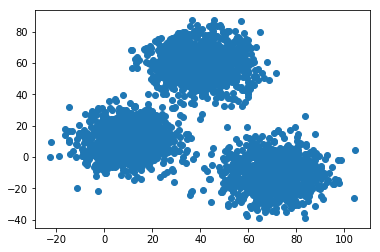

In [11]:
# .. your code
#Make a scater plot with two features
plt.scatter(f1,f2)

In [15]:
# run KMeans on df (with n_clusters=4) - that is what we specified when we created dataset

model = KMeans(n_clusters=3)
# fit kmeans object to data df
model.fit(mydata)
labels = model.predict(mydata)

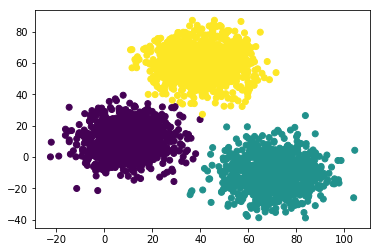

In [16]:
# make a scatter plot with labels
plt.scatter(f1,f2,c=labels)
plt.show()

[[  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]]


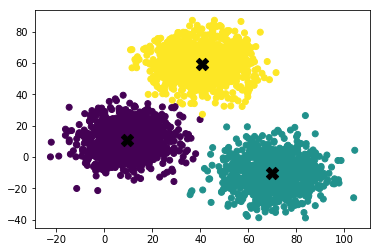

In [18]:
centroids = model.cluster_centers_
print(centroids)

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(f1,f2,c=labels)
plt.scatter(centroids_x,centroids_y, marker = 'X', s=150, c='black')

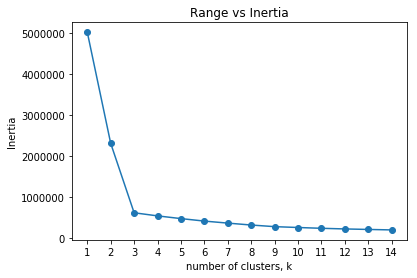

In [20]:
# make a range
ks = range(1, 15)

inertias = [] # empty list

# do a for loop
for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(mydata)    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot Range vs Inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()
### In your final project - explain how to determine the  best number of clusters

## Extras

Final project data will have many columns. You may want to use corr() function. See and practice code below to learn.

In [1]:
import seaborn as sns

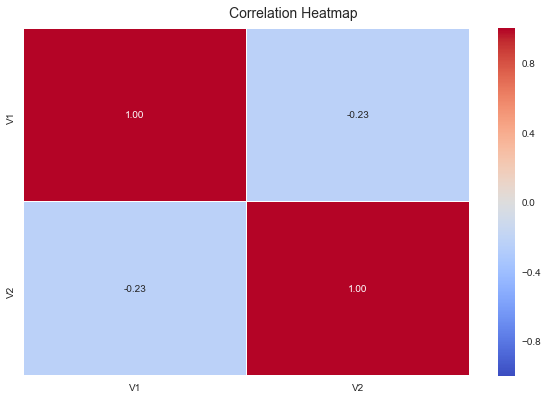

In [7]:
# Extras
# In final data you will have more than 2 columns, you can use corr() to check for any correlation between all features.
# Correlation Matrix Heatmap.
# Here you have only 2x2 heatmap and you can see there is not correlation between two columns.
f, ax = plt.subplots(figsize=(10, 6))
corr = mydata.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)